# Sử dụng thư viện vietnam-stock-analysis

In [1]:
import sys

sys.path.append("..")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


from vietnam_stock_analysis.stock_reader import TickerDataReader, TickerGroupDataReader
from vietnam_stock_analysis.stock_analyzer import StockAnalyzer, AssetGroupAnalyzer

## 1. Đọc data

## 1.1 Đọc data đơn

In [2]:
vnm = TickerDataReader("vnm")
vnm

VNM ['08/08/2020', '07/09/2020']

In [3]:
vnm_data = vnm.historical_data

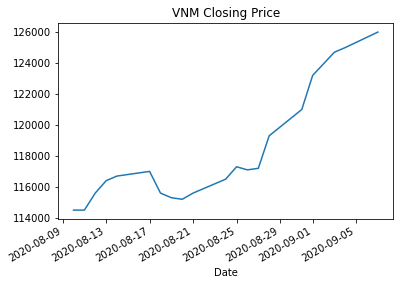

In [4]:
vnm_data['Close'].plot()
plt.title('VNM Closing Price')
plt.show()

## 1.2 Đọc data theo nhóm

In [5]:
group = TickerGroupDataReader(['vnm', 'ctg', 'aaa'])
group

['VNM', 'CTG', 'AAA'] - ['08/08/2020', '07/09/2020']

In [6]:
group.summary_info

name                   AAA           CTG           VNM
Close  count  2.000000e+01  2.000000e+01  2.000000e+01
       mean   1.227000e+04  2.433500e+04  1.181850e+05
       std    3.237933e+02  1.068582e+03  3.708351e+03
       min    1.150000e+04  2.280000e+04  1.145000e+05
       25%    1.217500e+04  2.337500e+04  1.156000e+05
       50%    1.230000e+04  2.435000e+04  1.168500e+05
       75%    1.251250e+04  2.502500e+04  1.197250e+05
       max    1.270000e+04  2.615000e+04  1.260000e+05
High   count  2.000000e+01  2.000000e+01  2.000000e+01
       mean   1.241750e+04  2.467500e+04  1.189550e+05
       std    3.261720e+02  1.148626e+03  3.672440e+03
       min    1.160000e+04  2.330000e+04  1.150000e+05
       25%    1.233750e+04  2.355000e+04  1.163750e+05
       50%    1.250000e+04  2.460000e+04  1.179000e+05
       75%    1.261250e+04  2.558750e+04  1.202500e+05
       max    1.285000e+04  2.660000e+04  1.284000e+05
Low    count  2.000000e+01  2.000000e+01  2.000000e+01
       mean   1.209750e+04  2.409000e+04  1.172850e+05
       std    3.496144e+02  1.015226e+03  3.242850e+03
       min    1.145000e+04  2.280000e+04  1.140000e+05
       25%    1.195000e+04  2.318750e+04  1.150500e+05
       50%    1.217500e+04  2.405000e+04  1.161000e+05
       75%    1.232500e+04  2.485000e+04  1.177750e+05
       max    1.255000e+04  2.585000e+04  1.249000e+05
Open   count  2.000000e+01  2.000000e+01  2.000000e+01
       mean   1.223000e+04  2.433250e+04  1.179550e+05
       std    3.664912e+02  1.084857e+03  3.085531e+03
       min    1.150000e+04  2.310000e+04  1.145000e+05
       25%    1.205000e+04  2.337500e+04  1.160000e+05
       50%    1.230000e+04  2.415000e+04  1.170000e+05
       75%    1.246250e+04  2.507500e+04  1.185750e+05
       max    1.270000e+04  2.635000e+04  1.250000e+05
Volume count  2.000000e+01  2.000000e+01  2.000000e+01
       mean   3.454668e+06  5.438162e+06  1.374242e+06
       std    1.545222e+06  2.210900e+06  4.342333e+05
       min    6.961500e+05  2.560050e+06  6.045700e+05
       25%    2.624130e+06  4.020925e+06  9.631025e+05
       50%    3.325080e+06  4.952555e+06  1.430370e+06
       75%    4.376122e+06  6.937072e+06  1.648825e+06
       max    7.045590e+06  9.589990e+06  2.178380e+06

In [7]:
group.portfolio.tail(5)

,Close,High,Low,Open,Volume
Date,,,,,
2020-08-31,159250.0,160000.0,157200.0,158700.0,12361830
2020-09-01,161850.0,161900.0,158200.0,159200.0,8321150
2020-09-03,163150.0,164050.0,161800.0,162450.0,12035240
2020-09-04,163550.0,163950.0,160950.0,161650.0,10533320
2020-09-07,163600.0,167400.0,162450.0,163700.0,13481980


In [8]:
group_data = group.raw_data
group_data.sample(n=5)

,Close,Currency,High,Low,Open,Volume,name
Date,,,,,,,
2020-08-20,115200.0,VND,115800.0,114600.0,115300.0,1254280,VNM
2020-08-14,23500.0,VND,23850.0,23250.0,23650.0,5238720,CTG
2020-08-28,12550.0,VND,12700.0,12550.0,12700.0,2751270,AAA
2020-09-01,26150.0,VND,26150.0,25600.0,25700.0,4773840,CTG
2020-09-03,12500.0,VND,12650.0,12450.0,12600.0,1674950,AAA


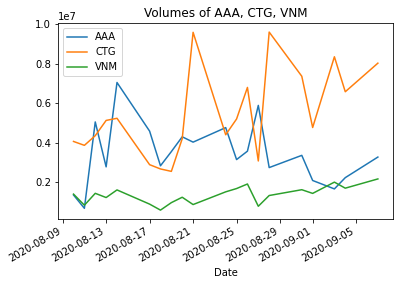

In [9]:
group_data.groupby('name')['Volume'].plot()
plt.legend()
plt.title('Volumes of AAA, CTG, VNM')
plt.show()

## 2. Phân tích các chỉ số kĩ thuật

## 2.1 Phân tích theo mã

In [10]:
vnm_analyzer = StockAnalyzer(vnm_data)

In [11]:
vnm_analyzer.resistance()

127966.66666666666

In [12]:
vnm_analyzer.support(level=2)

122933.33333333333

In [13]:
## 2.2 Phân tích theo nhóm

In [14]:
group_analyzers = AssetGroupAnalyzer(group_data)

In [15]:
group_cummulative_returns = group_analyzers.analyze('cummulative_returns')
group_cummulative_returns

{'AAA': Date
 2020-08-10         NaN
 2020-08-11    0.995671
 2020-08-12    1.038961
 2020-08-13    1.034632
 2020-08-14    1.060606
 2020-08-17    1.073593
 2020-08-18    1.064935
 2020-08-19    1.056277
 2020-08-20    1.047619
 2020-08-21    1.060606
 2020-08-24    1.073593
 2020-08-25    1.060606
 2020-08-26    1.064935
 2020-08-27    1.099567
 2020-08-28    1.086580
 2020-08-31    1.086580
 2020-09-01    1.082251
 2020-09-03    1.082251
 2020-09-04    1.086580
 2020-09-07    1.090909
 Name: Close, dtype: float64,
 'CTG': Date
 2020-08-10         NaN
 2020-08-11    1.017544
 2020-08-12    1.026316
 2020-08-13    1.041667
 2020-08-14    1.030702
 2020-08-17    1.030702
 2020-08-18    1.017544
 2020-08-19    1.021930
 2020-08-20    1.021930
 2020-08-21    1.065789
 2020-08-24    1.070175
 2020-08-25    1.083333
 2020-08-26    1.083333
 2020-08-27    1.085526
 2020-08-28    1.100877
 2020-08-31    1.127193
 2020-09-01    1.146930
 2020-09-03    1.138158
 2020-09-04    1.140351
 2020-09

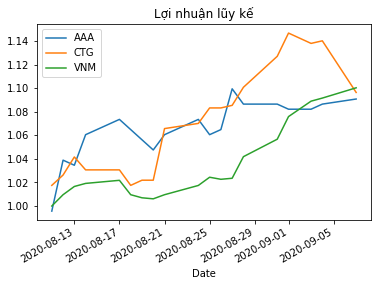

In [16]:
for name, data in group_cummulative_returns.items():
    data.plot(label=name, legend=True)

plt.title('Lợi nhuận lũy kế')
plt.show()